<a href="https://colab.research.google.com/github/prototype99/data-science-webinars/blob/main/pods_2223_w3_webinar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Taster of `groupby`

* In a range of situations, it is useful to partition the data into many groups and analyse those separarely; perhaps compare and contrast those groups based on a few metrics (say, compare countries based on GDP per capita, or diabetic vs non-diabetic patients).

In [ ]:
import pandas as pd

In [ ]:
gm = pd.read_csv(
    'https://raw.githubusercontent.com/gerberl/6G7V0026-2223/main/datasets/gapminder.tsv',
    sep='\t'
)

In [ ]:
gm.head(1)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314


In [ ]:
gm['continent']=='Europe'

0       False
1       False
2       False
3       False
4       False
        ...  
1699    False
1700    False
1701    False
1702    False
1703    False
Name: continent, Length: 1704, dtype: bool

In [ ]:
gm.query("continent=='Europe'")['gdpPercap'].mean()

14469.475533302224

In [ ]:
gm[ gm['continent']=='Europe' ]['gdpPercap'].mean()

14469.475533302224

In [ ]:
gm[ gm['continent']=='Asia' ]['gdpPercap'].mean()

7902.15042805404

In [ ]:
gm[ gm['continent']=='Asia' ]['gdpPercap'].std()

14045.37311168379

In [ ]:
gm[ gm['continent']=='Europe' ]['gdpPercap'].std()

9355.213498375519

In [ ]:
gm['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [ ]:
gm.groupby('continent')['gdpPercap'].mean()

continent
Africa       2193.754578
Americas     7136.110356
Asia         7902.150428
Europe      14469.475533
Oceania     18621.609223
Name: gdpPercap, dtype: float64

GroupBy: Split, Apply, Combine: https://learning.oreilly.com/library/view/python-data-science/9781491912126/ch03.html#:-:text=GroupBy%3A%20Split%2C%20Apply%2C%20Combine

In [ ]:
# total population per continent on this sample of the Gapminder dataset
gm.query('year==2007').groupby('continent')['pop'].sum()

continent
Africa       929539692
Americas     898871184
Asia        3811953827
Europe       586098529
Oceania       24549947
Name: pop, dtype: int64

In [ ]:
titanic = pd.read_csv('https://raw.githubusercontent.com/gerberl/6G7V0026-2223/main/datasets/titanic-kaggle/titanic.csv')

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
titanic.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

In [ ]:
titanic.groupby('Sex')['Survived'].value_counts(normalize=True)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

In [ ]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

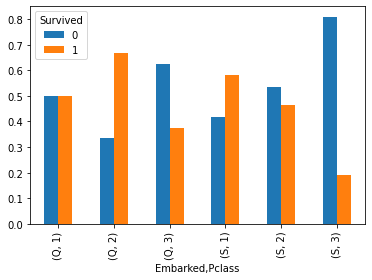

In [ ]:
(
    titanic
    .loc[ titanic['Embarked'].isin(['Q', 'S']) ]
    .groupby(['Embarked', 'Pclass'])
    ['Survived']
    .value_counts(normalize=True, sort=False)
).unstack('Survived').plot.bar()

Text(0.5, 0, 'Survived and Travelling Class')

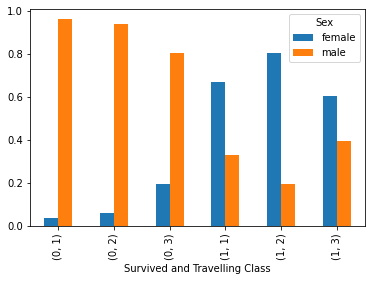

In [ ]:
ax = (
    titanic
    .groupby(['Survived', 'Pclass'])
    ['Sex']
    .value_counts(normalize=True, sort=False)
).unstack('Sex').plot.bar()
ax.set_xlabel('Survived and Travelling Class')